# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

# Import Data

In [3]:
df = pd.read_csv('./data/NYC_Restaurant_Inspections_Data_Cleaned.csv')

In [3]:
df.shape

(120764, 105)

In [4]:
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2,2016,1,1,...,0,0,0,0,0,0,0,0,10.0,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2017,1,1,...,0,0,0,0,0,0,0,0,7.0,1
2,2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2018,0,2,...,0,0,0,0,0,0,0,0,5.0,1
3,3,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2018,1,2,...,0,0,0,0,0,0,0,0,12.0,1
4,4,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2019,1,2,...,0,0,0,0,0,0,0,0,13.0,1


In [5]:
# look at number of citations with null values for Score
df[df.SCORE.isnull()==True].shape

(2224, 105)

In [4]:
# drop them
data = df[df.SCORE.isnull() == False].copy()

In [7]:
# check shape - dropped 2224 observations
data.shape

(118540, 105)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118540 entries, 0 to 120763
Columns: 105 entries, Unnamed: 0 to GRADE
dtypes: float64(2), int64(100), object(3)
memory usage: 95.9+ MB


# Exploratory Data Analysis

### Correlation Evaluation

In [9]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5
data.corr()[(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
Unnamed: 0,1.000000,0.887583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMIS,0.887583,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION MONTH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION YEAR,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799106,-0.538281
FLAG__Not Critical,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr()['VIOLATION__04G':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__04N':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__04N,VIOLATION__04O,VIOLATION__05A,VIOLATION__05B,VIOLATION__05C,VIOLATION__05D,VIOLATION__05E,VIOLATION__05F,VIOLATION__05H,VIOLATION__06A,...,VIOLATION__10B,VIOLATION__10C,VIOLATION__10D,VIOLATION__10E,VIOLATION__10F,VIOLATION__10G,VIOLATION__10H,VIOLATION__10I,VIOLATION__10J,VIOLATION__15I
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__05A':'VIOLATION__10B'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__05A,VIOLATION__05B,VIOLATION__05C,VIOLATION__05D,VIOLATION__05E,VIOLATION__05F,VIOLATION__05H,VIOLATION__06A,VIOLATION__06B,VIOLATION__06C,...,VIOLATION__06I,VIOLATION__07A,VIOLATION__08A,VIOLATION__08B,VIOLATION__08C,VIOLATION__09A,VIOLATION__09B,VIOLATION__09C,VIOLATION__10A,VIOLATION__10B
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.651625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__06C':'VIOLATION__06I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__06C,VIOLATION__06D,VIOLATION__06E,VIOLATION__06F,VIOLATION__06G,VIOLATION__06H,VIOLATION__06I
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Class Imbalance Evaluation

In [14]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
data.GRADE.value_counts()

1    70515
0    48025
Name: GRADE, dtype: int64

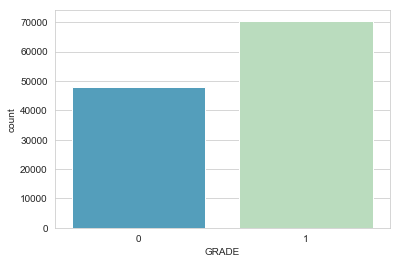

In [15]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=data,palette='GnBu_r')

### Outlier Evaluation

In [16]:
data.describe()

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
count,118540.000000,1.185400e+05,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,...,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000
mean,60750.560267,4.574628e+07,10672.398212,6.081373,2017.374599,1.740720,1.368677,0.002328,0.165472,0.003729,...,0.000911,0.014704,0.006293,0.000346,0.013337,0.001029,0.025240,0.021621,14.954397,0.594862
std,34871.709069,4.425225e+06,595.727239,3.423076,1.058624,1.338638,1.059516,0.048197,0.378847,0.060949,...,0.030171,0.123411,0.079080,0.018595,0.115082,0.032065,0.161153,0.159657,10.783543,0.490921
min,0.000000,3.007544e+07,10000.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,30569.750000,4.134843e+07,10022.000000,3.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,61056.500000,5.000106e+07,10467.000000,6.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
75%,90971.250000,5.004639e+07,11228.000000,9.000000,2018.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,120763.000000,5.009212e+07,12345.000000,12.000000,2019.000000,14.000000,14.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,166.000000,1.000000


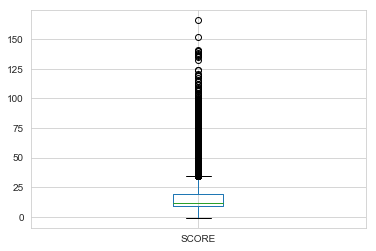

In [17]:
# visualize for outliers of scores
data.boxplot(column='SCORE')

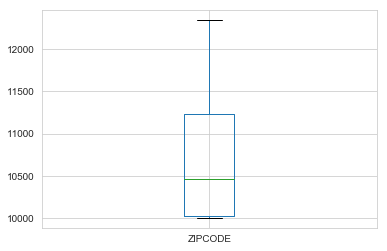

In [18]:
# visualize outliers of zipcodes
data.boxplot(column='ZIPCODE')

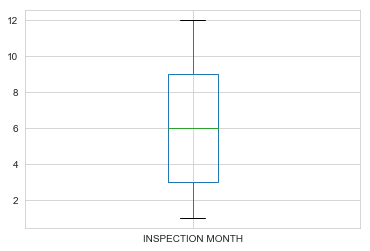

In [19]:
# visualize outliers of Inspection Month
data.boxplot(column='INSPECTION MONTH')

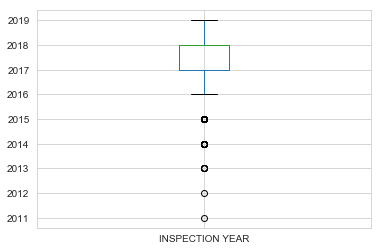

In [20]:
# visualize outliers of Inspection Year
data.boxplot(column='INSPECTION YEAR')

In [5]:
# drop rows where inspections were completed before 2016
data = data[data['INSPECTION YEAR'] >= 2016]

In [6]:
data.shape

(114950, 105)

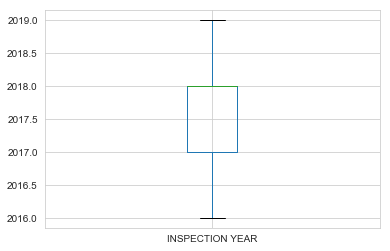

In [23]:
# visualize outliers of Inspection Year
data.boxplot(column='INSPECTION YEAR')

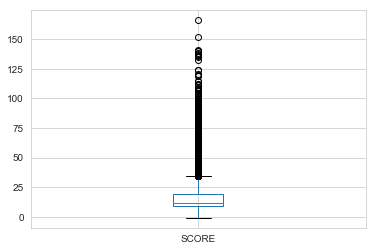

In [24]:
# visualize for outliers of scores again after dropping some rows
data.boxplot(column='SCORE')

In [7]:
# drop rows where score is greater than 28 pts (according to restaurant inspection evaluation information - if score is above 28, restaurant will get a C or may be closed)
data = data[data.SCORE < 28.0]

In [26]:
data.shape

(102657, 105)

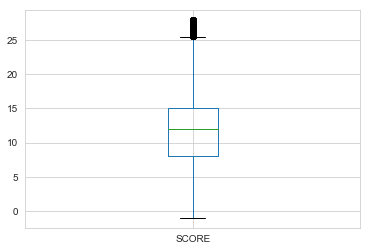

In [27]:
# visualize for outliers of scores again after dropping some rows
data.boxplot(column='SCORE')

In [8]:
# review value_counts of Grade column (1 = received an A, 0 = did not receive an A) to see if class distribution changed
data.GRADE.value_counts()

1    67906
0    34751
Name: GRADE, dtype: int64

In [29]:
# relook at general statistics to check for any changes
data.describe()

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
count,102657.000000,1.026570e+05,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,...,102657.000000,102657.000000,102657.000000,102657.000000,102657.00000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000
mean,60315.758107,4.570666e+07,10672.520364,5.948148,2017.426664,1.477639,1.277663,0.001695,0.142445,0.003341,...,0.000789,0.012527,0.005796,0.000331,0.01206,0.000458,0.023661,0.019745,12.105636,0.661484
std,34695.872055,4.425593e+06,595.687793,3.403733,0.985547,1.019196,0.972460,0.041135,0.355066,0.057707,...,0.028079,0.114332,0.075911,0.018196,0.10942,0.021392,0.156352,0.151782,6.008747,0.473207
min,0.000000,3.007544e+07,10000.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,30225.000000,4.134002e+07,10022.000000,3.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000
50%,60511.000000,5.000075e+07,10467.000000,5.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,12.000000,1.000000
75%,90427.000000,5.004600e+07,11228.000000,9.000000,2018.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.000000,1.000000
max,120763.000000,5.009212e+07,12345.000000,12.000000,2019.000000,12.000000,10.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.00000,1.000000,3.000000,5.000000,27.888889,1.000000


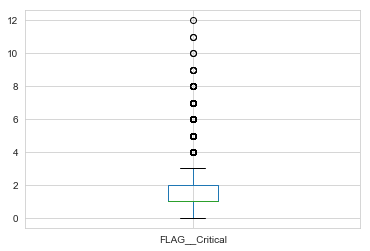

In [30]:
# visualize outliers of Critical Flags
data.boxplot(column='FLAG__Critical')

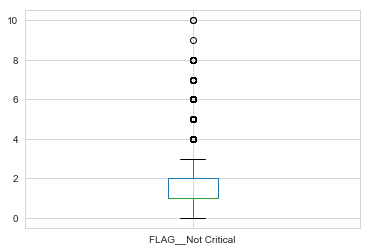

In [31]:
# visualize outliers of Critical Flags
data.boxplot(column='FLAG__Not Critical')

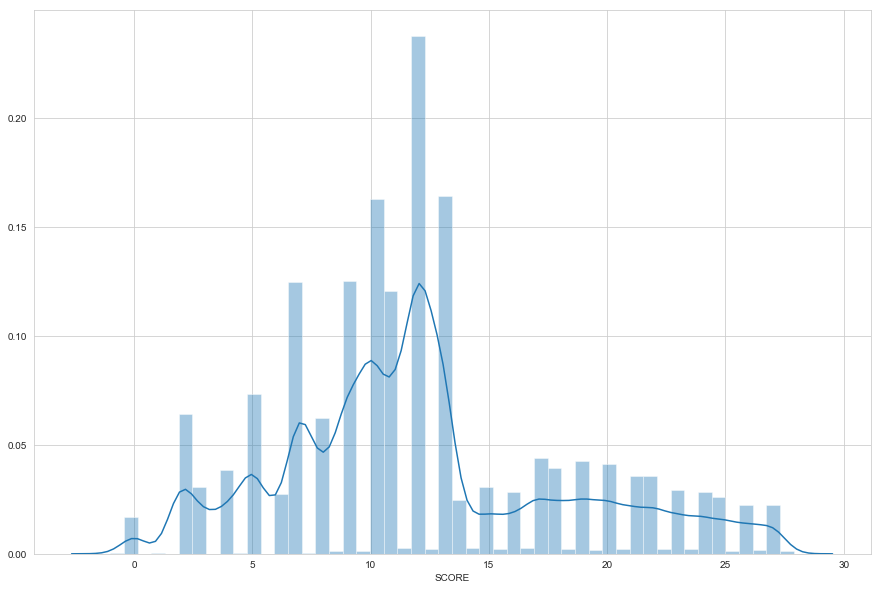

In [32]:
plt.figure(figsize=(15,10))
sns.distplot(data.SCORE)

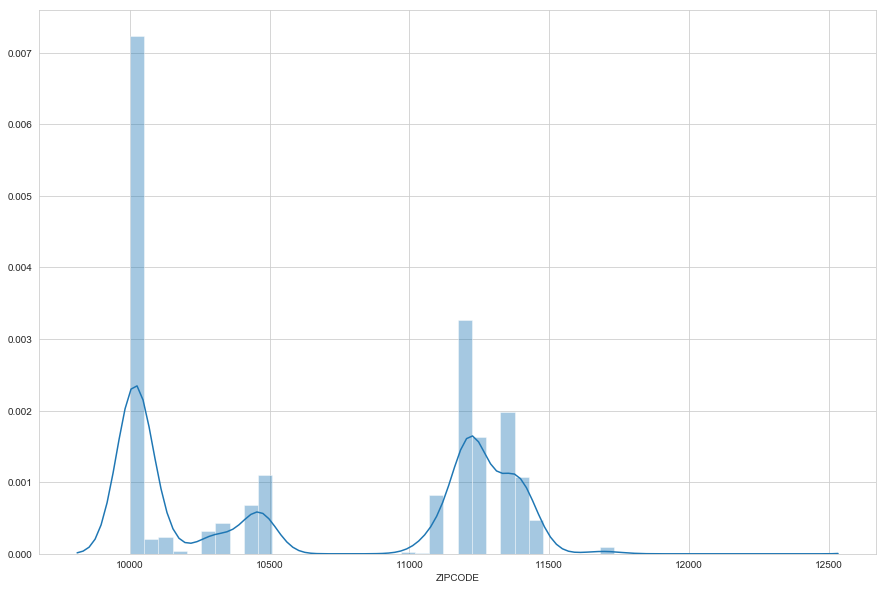

In [33]:
plt.figure(figsize=(15,10))
sns.distplot(data.ZIPCODE)

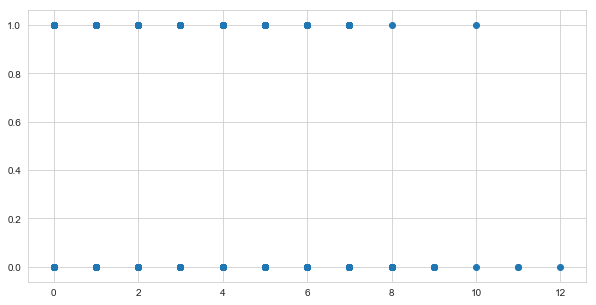

In [34]:
# visualize relationship between number of critical violations vs Grade
plt.figure(figsize=(10,5))
plt.scatter(data['FLAG__Critical'], data['GRADE'])

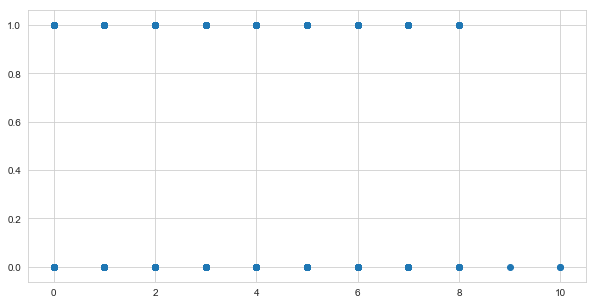

In [35]:
# visualize relationship between number of non-critical violations vs Grade
plt.figure(figsize=(10,5))
plt.scatter(data['FLAG__Not Critical'], data['GRADE'])

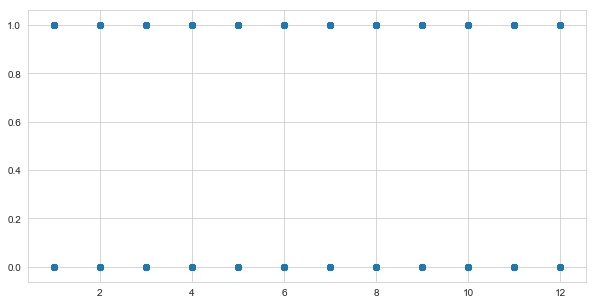

In [36]:
# visualize relationship between Inspection Month vs. Grade
plt.figure(figsize=(10,5))
plt.scatter(data['INSPECTION MONTH'], data['GRADE'])

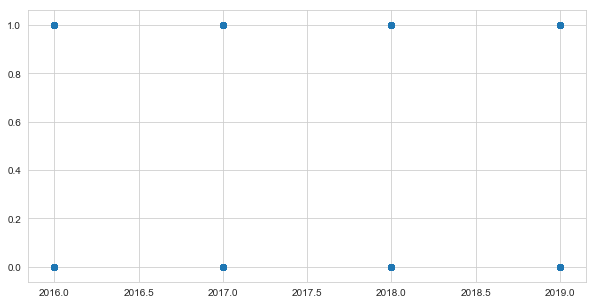

In [37]:
# visualize relationship between Inspection Year vs. Grade
plt.figure(figsize=(10,5))
plt.scatter(data['INSPECTION YEAR'], data['GRADE'])

<Figure size 2160x1800 with 0 Axes>

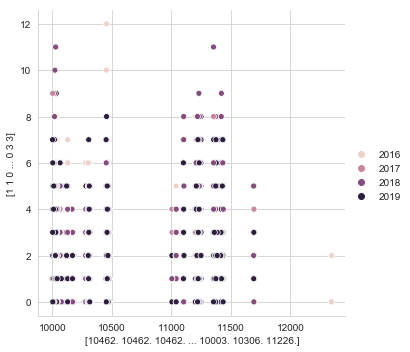

In [38]:
plt.figure(figsize=(30,25))
sns.relplot(x=data['ZIPCODE'].values, y=data['FLAG__Critical'].values, hue=data['INSPECTION YEAR'].values, data=data)

Statistical Summary of Score


Did Not Receive an A
         count       mean      std  min   25%   50%   75%        max
SCORE  34751.0  17.341082  6.21555 -1.0  13.0  18.0  22.0  27.888889
--------------------------------------------------------------------------------
Received an A
         count      mean       std  min  25%   50%   75%        max
SCORE  67906.0  9.426389  3.688649  0.0  7.0  10.0  12.0  27.888889


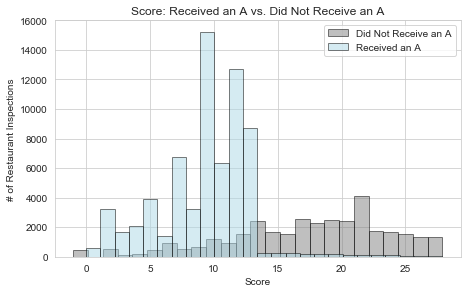

In [39]:
# Statistical summary of continuous variables 
print('Statistical Summary of Score')
print('\n')
print('Did Not Receive an A')
print(data[data['GRADE']==0][['SCORE']].describe().transpose())
print('--'*40)
print('Received an A')
print(data[data['GRADE']==1][['SCORE']].describe().transpose())

# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(data[data['GRADE']==0].SCORE, bins = 25, label ='Did Not Receive an A', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(data[data['GRADE']==1].SCORE, bins = 25, label = 'Received an A', alpha = .50, edgecolor = 'black',color = 'lightblue')
ax1.set_title('Score: Received an A vs. Did Not Receive an A')
ax1.set_xlabel('Score')
ax1.set_ylabel('# of Restaurant Inspections')
ax1.legend(loc = 'upper right')

Text(0.5, 1.0, 'Zip Codes of Restaurant Inspections')

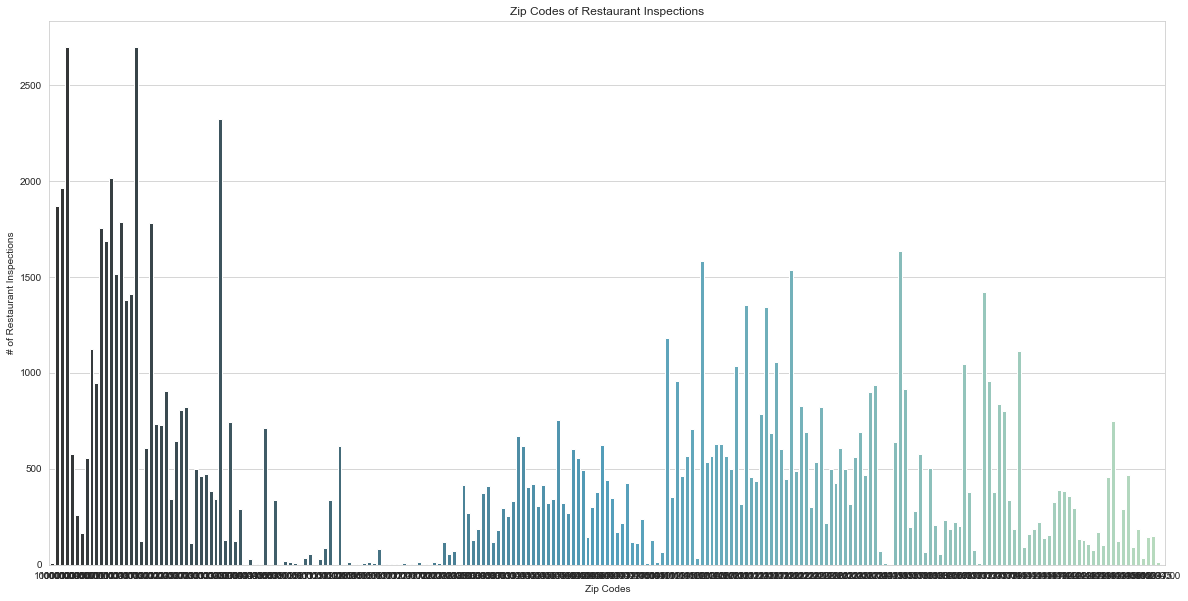

In [40]:
# Plot of Frequency of Zip Codes
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = data['ZIPCODE'], data = data, palette = 'GnBu_d')
ax.set_xlabel('Zip Codes')
ax.set_ylabel('# of Restaurant Inspections')
ax.set_title('Zip Codes of Restaurant Inspections')

Text(0.5, 1.0, 'Critical Violations vs. Restaurant Inspection Grade')

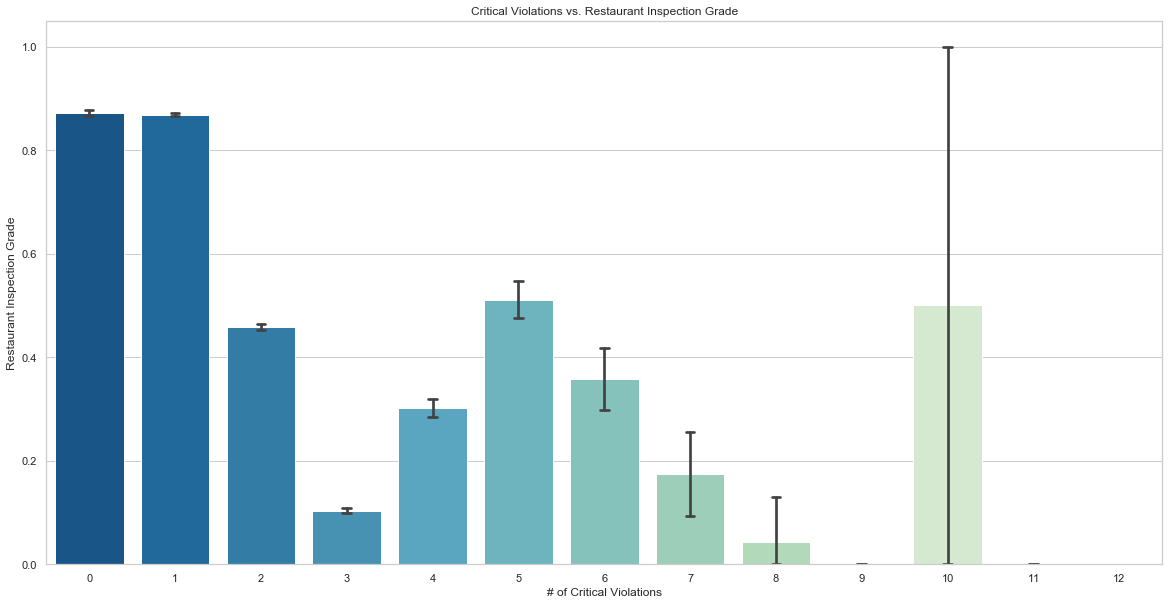

In [41]:
# Plot of Number of Critical Flags vs. Grade
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(x="FLAG__Critical", y="GRADE", data=data, capsize=.1, palette="GnBu_r")
ax.set_xlabel('# of Critical Violations')
ax.set_ylabel('Restaurant Inspection Grade')
ax.set_title('Critical Violations vs. Restaurant Inspection Grade')

In [42]:
data.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION MONTH', 'INSPECTION YEAR', 'FLAG__Critical',
       'FLAG__Not Critical',
       ...
       'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B',
       'VIOLATION__22C', 'VIOLATION__22E', 'VIOLATION__None',
       'VIOLATION__Other', 'SCORE', 'GRADE'],
      dtype='object', length=105)

Text(0.5, 1.0, 'Cuisine vs. Restaurant Inspection Grade')

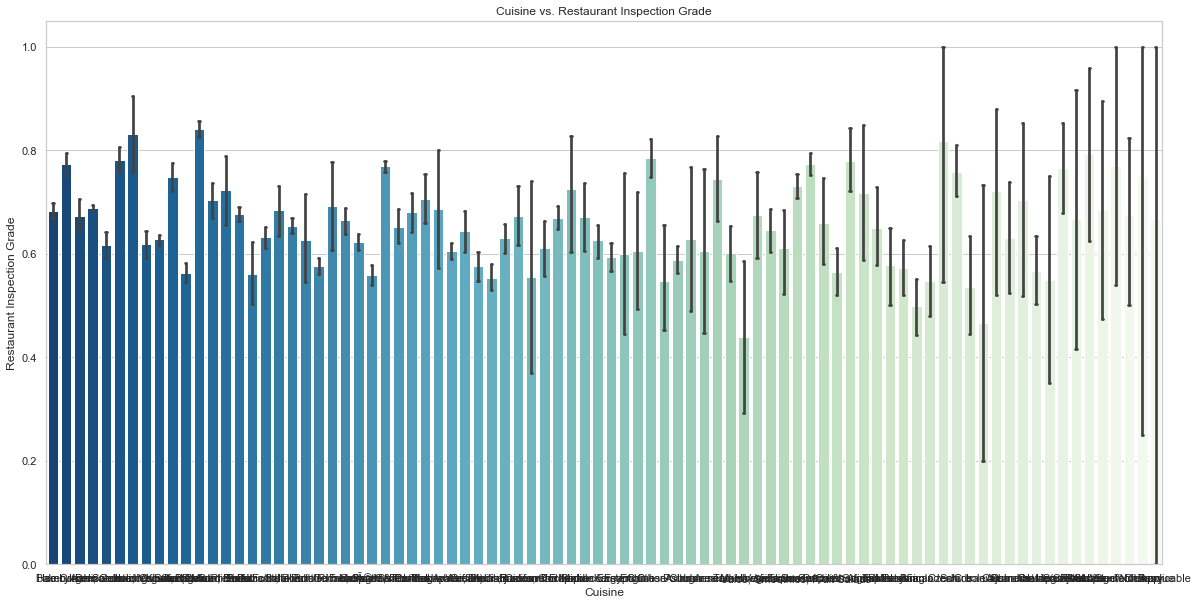

In [43]:
# Plot of Number of Critical Flags vs. Grade
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(x='CUISINE DESCRIPTION', y='GRADE', data=data, capsize=.1, palette="GnBu_r")
ax.set_xlabel('Cuisine')
ax.set_ylabel('Restaurant Inspection Grade')
ax.set_title('Cuisine vs. Restaurant Inspection Grade')

Text(0.5, 1.0, 'Cuisines Breakdown of Restaurant Inspections')

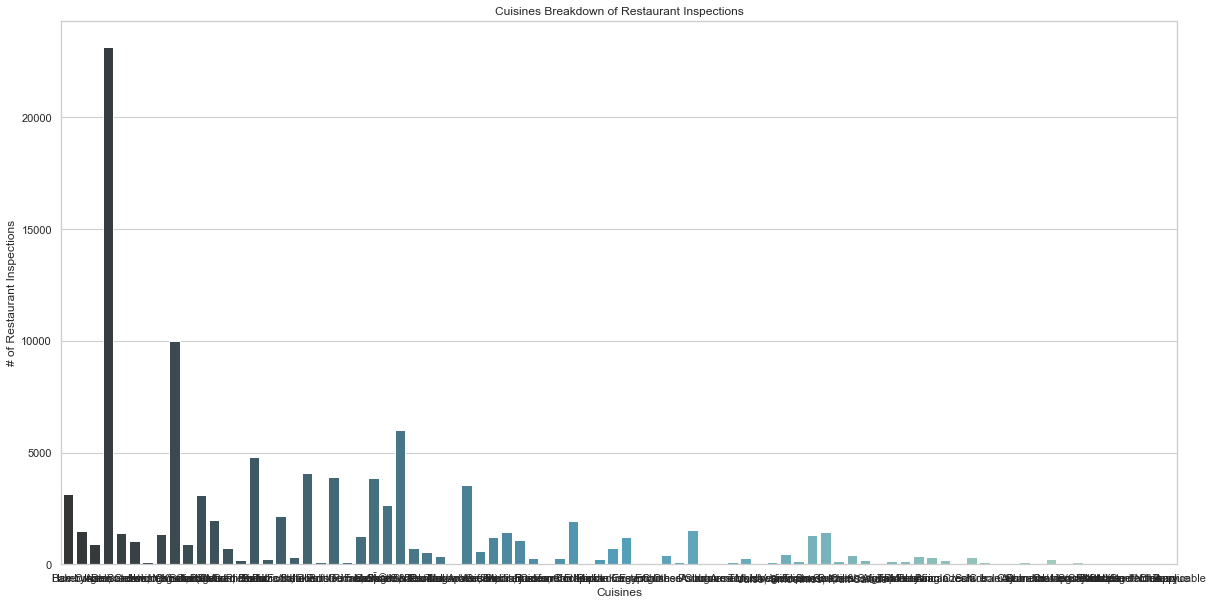

In [44]:
# Plot of Frequency of Cuisines in Restaurant Inspections
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = 'CUISINE DESCRIPTION', data = data, palette = 'GnBu_d')
ax.set_xlabel('Cuisines')
ax.set_ylabel('# of Restaurant Inspections')
ax.set_title('Cuisines Breakdown of Restaurant Inspections')

In [45]:
# create table for heatmap visualization (next step)
dt_grade = data.pivot_table(index='INSPECTION MONTH', columns='INSPECTION YEAR',values='GRADE') 

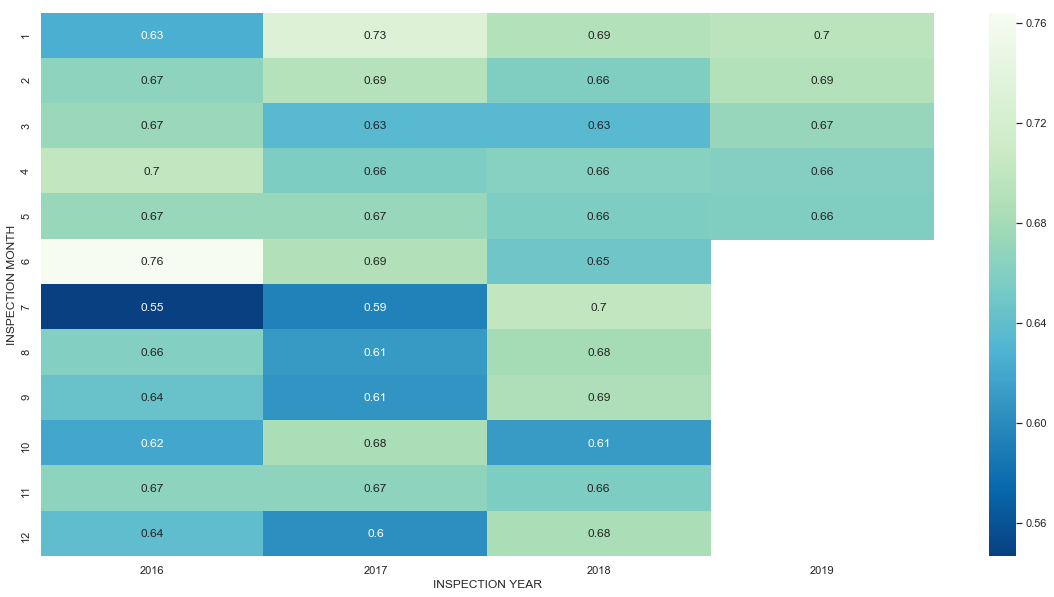

In [46]:
# visualizing the relationship between when restaurant inspection was conducted and grade
plt.figure(figsize=(20,10))
sns.heatmap(dt_grade, annot=True, cmap='GnBu_r')

# Feature Engineering & Selection

In [ ]:
# # categorize dummy variables into groups based on the number each code begins with
# data['VIOLATION_02'] = data.loc[:, 'VIOLATION__02A':'VIOLATION__02J'].sum(axis=1)
# data['VIOLATION_03'] = data.loc[:, 'VIOLATION__03A':'VIOLATION__03G'].sum(axis=1)
# data['VIOLATION_04'] = data.loc[:, 'VIOLATION__04A':'VIOLATION__04O'].sum(axis=1)
# data['VIOLATION_05'] = data.loc[:, 'VIOLATION__05A':'VIOLATION__05H'].sum(axis=1)
# data['VIOLATION_06'] = data.loc[:, 'VIOLATION__06A':'VIOLATION__06I'].sum(axis=1)
# data['VIOLATION_08'] = data.loc[:, 'VIOLATION__08A':'VIOLATION__08C'].sum(axis=1)
# data['VIOLATION_09'] = data.loc[:, 'VIOLATION__09A':'VIOLATION__09C'].sum(axis=1)
# data['VIOLATION_10'] = data.loc[:, 'VIOLATION__10A':'VIOLATION__10J'].sum(axis=1)
# data['VIOLATION_15'] = data.loc[:, 'VIOLATION__15I':'VIOLATION__15T'].sum(axis=1)
# data['VIOLATION_16'] = data.loc[:, 'VIOLATION__16A':'VIOLATION__16F'].sum(axis=1)
# data['VIOLATION_18'] = data.loc[:, 'VIOLATION__18B':'VIOLATION__18G'].sum(axis=1)
# data['VIOLATION_20'] = data.loc[:, 'VIOLATION__20A':'VIOLATION__20F'].sum(axis=1)
# data['VIOLATION_22'] = data.loc[:, 'VIOLATION__22A':'VIOLATION__22E'].sum(axis=1)

In [ ]:
# # drop dummy variable columns
# data_sub = data.drop(['Unnamed: 0', 'VIOLATION__02A', 'VIOLATION__02B', 'VIOLATION__02C', 'VIOLATION__02D', 'VIOLATION__02E', 'VIOLATION__02F', 'VIOLATION__02G',
#  'VIOLATION__02H', 'VIOLATION__02I', 'VIOLATION__02J', 'VIOLATION__03A', 'VIOLATION__03B', 'VIOLATION__03C', 'VIOLATION__03D',
#  'VIOLATION__03E', 'VIOLATION__03F', 'VIOLATION__03G', 'VIOLATION__04A', 'VIOLATION__04B', 'VIOLATION__04C', 'VIOLATION__04D',
#  'VIOLATION__04E', 'VIOLATION__04F', 'VIOLATION__04G', 'VIOLATION__04H', 'VIOLATION__04I', 'VIOLATION__04J', 'VIOLATION__04K',
#  'VIOLATION__04L', 'VIOLATION__04M', 'VIOLATION__04N', 'VIOLATION__04O', 'VIOLATION__05A', 'VIOLATION__05B', 'VIOLATION__05C',
#  'VIOLATION__05D', 'VIOLATION__05E', 'VIOLATION__05F', 'VIOLATION__05H', 'VIOLATION__06A', 'VIOLATION__06B', 'VIOLATION__06C',
#  'VIOLATION__06D', 'VIOLATION__06E', 'VIOLATION__06F', 'VIOLATION__06G', 'VIOLATION__06H', 'VIOLATION__06I',
#  'VIOLATION__08A', 'VIOLATION__08B', 'VIOLATION__08C', 'VIOLATION__09A', 'VIOLATION__09B', 'VIOLATION__09C', 'VIOLATION__10A',
#  'VIOLATION__10B', 'VIOLATION__10C', 'VIOLATION__10D', 'VIOLATION__10E', 'VIOLATION__10F', 'VIOLATION__10G', 'VIOLATION__10H',
#  'VIOLATION__10I', 'VIOLATION__10J', 'VIOLATION__15I', 'VIOLATION__15J', 'VIOLATION__15K', 'VIOLATION__15L', 'VIOLATION__15S', 'VIOLATION__15T', 'VIOLATION__16A', 'VIOLATION__16B',
#  'VIOLATION__16C', 'VIOLATION__16D', 'VIOLATION__16E', 'VIOLATION__16F', 'VIOLATION__18B', 'VIOLATION__18C',
#  'VIOLATION__18D', 'VIOLATION__18F', 'VIOLATION__18G', 'VIOLATION__20A',
#  'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 
# 'VIOLATION__22E'], axis=1).copy()

In [9]:
# grouping cuisines in different groups to convert to numeric
african = ['Egyptian', 'Moroccan', 'Ethiopian', 'African']
american = ['Hotdogs/Pretzels', 'Seafood', 'Tex-Mex', 'Hamburgers', 'American', 'Hotdogs', 'Steak', 'Californian', 'Chicken', 'Barbecue', 'Hawaiian', 'Cajun', 'Creole', 'Soul Food', 'Creole/Cajun', 'Creole/Cajun', 'Southwestern']
asia_pacific = ['Indonesian', 'Filipino']
asian = ['Asian', 'Chinese', 'Japanese', 'Thai', 'Indian', 'Korean', 'Vietnamese/Cambodian/Malaysia','Chinese/Japanese', 'Bangladeshi', 'Pakistani']
australian = 'Australian'
european = ['Basque', 'Scandinavian', 'Tapas', 'Irish', 'Continental', 'Pizza', 'Pizza/Italian', 'Italian', 'Polish', 'German', 'French', 'Spanish', 'Greek', 'Mediterranean', 'Eastern European', 'English', 'Portuguese', 'Tapas']
kosher = 'Jewish/Kosher'
latin = ['Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Caribbean', 'Brazilian', 'Mexican', 'Chinese/Cuban', 'Peruvian', 'Chilean']
middle_eastern = ['Middle Eastern', 'Afghan', 'Armenian', 'Turkish', 'Iranian']
russian = ['Russian', 'Czech']
bakeries = ['Bagels/Pretzels', 'Donuts', 'CafÃ©/Coffee/Tea', 'Bakery']
delis = ['Delicatessen', 'Sandwiches/Salads/Mixed Buffet', 'Pancakes/Waffles', 'Soups & Sandwiches', 'Sandwiches', 'Soups']
beverages = ['Juice, Smoothies, Fruit Salads', 'Bottled beverages, including water, sodas, juices, etc.']
healthy = ['Vegetarian', 'Salads', 'Fruits/Vegetables', 'Nuts/Confectionary']
cold_desserts = 'Ice Cream, Gelato, Yogurt, Ices'
other = 'Other'
unknown = 'Not Listed/Not Applicable'

In [10]:
# define a function to convert string value in CUISINE DESCRIPTION to numeric for categorical variable
def categorize_cuisine(x):
    if x in african:
        return 'African'
    elif x in american:
        return 'American'
    elif x in asia_pacific:
        return 'Asia Pacific'
    elif x in asian:
        return 'Asian'
    elif x == australian:
        return 'Australian'
    elif x in european:
        return 'European'
    elif x in kosher:
        return 'Kosher'
    elif x in latin:
        return 'Latin'
    elif x in middle_eastern:
        return 'Middle_Eastern'
    elif x in russian:
        return 'Russian'
    elif x in bakeries:
        return 'Bakeries'
    elif x in delis:
        return 'Delis'
    elif x in beverages:
        return 'Beverages'
    elif x in healthy:
        return 'Healthy'
    elif x in cold_desserts:
        return 'Cold Desserts'
    elif x in other:
        return 'Other'
    else:
        return 'Unknown'

In [11]:
# create new column and convert cuisine to a number
data['CUISINES'] = data['CUISINE DESCRIPTION'].apply(categorize_cuisine)

In [12]:
# drop Cuisine Description column since we have the new Cuisines column
data = data.drop(['CUISINE DESCRIPTION'], axis=1)

In [13]:
data.head()

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,...,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE,CUISINES
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,2,2016,1,1,0,...,0,0,0,0,0,0,0,10.0,1,Bakeries
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2017,1,1,0,...,0,0,0,0,0,0,0,7.0,1,Bakeries
2,2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2018,0,2,0,...,0,0,0,0,0,0,0,5.0,1,Bakeries
3,3,30112340,WENDY'S,BROOKLYN,11225.0,3,2018,1,2,0,...,0,0,0,0,0,0,0,12.0,1,American
4,4,30112340,WENDY'S,BROOKLYN,11225.0,3,2019,1,2,0,...,0,0,0,0,0,0,0,13.0,1,American


In [14]:
# create dummy variables of BORO column
boro_dummies = pd.get_dummies(data['BORO'])

In [15]:
# concat the boro_dummies dataframe into the main dataframe
data_boro = pd.concat([data, boro_dummies], axis=1)

In [16]:
# create dummy variables of ZIPCODE column
zipcode_dummies = pd.get_dummies(data_boro['ZIPCODE'], prefix='ZIP')

In [17]:
# concat the zipcode_dummies dataframe into main dataframe
data_zip = pd.concat([data_boro, zipcode_dummies], axis=1)

In [18]:
# create dummy variables of INSPECTION MONTH column
month_dummies = pd.get_dummies(data_zip['INSPECTION MONTH'], prefix='MONTH')

In [19]:
# concat the month_dummies dataframe into main dataframe
data_month = pd.concat([data_zip, month_dummies], axis=1)

In [20]:
# create dummy variables of INSPECTION YEAR column
year_dummies = pd.get_dummies(data_month['INSPECTION YEAR'], prefix='YEAR')

In [21]:
# concat the year_dummies dataframe into main dataframe
data_year = pd.concat([data_month, year_dummies], axis=1)

In [22]:
# create dummy variables of CUISINES column
cuisine_dummies = pd.get_dummies(data_month['CUISINES'])

In [23]:
# concat the year_dummies dataframe into main dataframe
data_cuisine = pd.concat([data_year, cuisine_dummies], axis=1)

In [24]:
# separate dataframe into a smaller dataframe with features for models
features = data_cuisine.loc[:, 'FLAG__Critical':'Russian'].drop(['CUISINES'], axis=1)

In [63]:
features.head()

,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,...,Beverages,Cold Desserts,Delis,European,Healthy,Kosher,Latin,Middle_Eastern,Other,Russian
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model

### Import Libraries

In [1]:
# import libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, f1_score, classification_report, confusion_matrix, accuracy_score

### Train Test Split

In [25]:
# identify X and y
X = features.drop(['GRADE', 'VIOLATION__Other', 'YEAR_2019', 'MONTH_12'], axis=1)
y = features.GRADE

In [26]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fixing Class Imbalance

In [27]:
# Concat X_train, y_train together into a training dataset
data_train = pd.concat([X_train, y_train], axis=1)

In [28]:
# Separate minority and majority classes
No_A = data_train[data_train.GRADE==0]
Yes_A = data_train[data_train.GRADE==1]

In [29]:
len(data_train)

82125

In [30]:
print('# of Restaurant Inspections that Did Not Receive An A: '+ str(len(No_A)))
print('# of Restaurant Inspections that Received an A: '+ str(len(Yes_A)))

# of Restaurant Inspections that Did Not Receive An A: 27737
# of Restaurant Inspections that Received an A: 54388


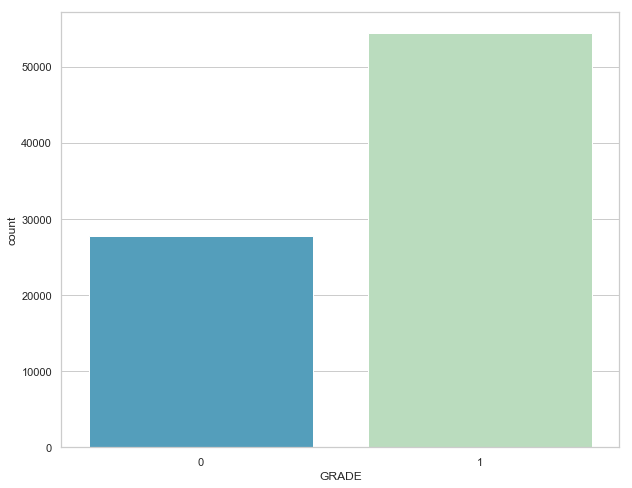

In [71]:
# visualize class balance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=data_train, palette='GnBu_r')

In [31]:
# Undersample majority
NoA_downsampled = resample(Yes_A,
                                replace = False, # sample without replacement
                                n_samples = len(No_A), # match minority n
                                random_state = 23) # reproducible results

In [32]:
len(NoA_downsampled)

27737

In [33]:
len(No_A)

27737

In [34]:
# combine minority and downsampled majority
downsampled = pd.concat([No_A, NoA_downsampled])

In [35]:
# check counts
downsampled.GRADE.value_counts()

1    27737
0    27737
Name: GRADE, dtype: int64

### Redefining X_Train, Y_Train with Training Dataset with Fixed Class Imbalance

In [36]:
y_train = downsampled.GRADE
X_train = downsampled.drop(['GRADE'], axis=1)

### Scaling the Data

In [37]:
# instantiate the scaler and fit to train data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
#Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(X_train)
data_feat = pd.DataFrame(scaled_features,columns=X.columns)
data_feat.head()

,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,...,Beverages,Cold Desserts,Delis,European,Healthy,Kosher,Latin,Middle_Eastern,Other,Russian
0,0.328406,-0.297717,-0.042496,-0.432848,-0.061496,-0.022472,-0.006005,-0.014083,-0.456695,-0.198704,...,-0.128998,-0.099239,-0.199335,2.116984,-0.08797,-0.117385,-0.364122,-0.106141,-0.058933,-0.0503
1,-0.606905,-0.297717,-0.042496,-0.432848,-0.061496,-0.022472,-0.006005,-0.014083,-0.456695,-0.198704,...,-0.128998,-0.099239,5.016670,-0.472370,-0.08797,-0.117385,-0.364122,-0.106141,-0.058933,-0.0503
2,1.263717,-1.303538,-0.042496,2.243459,-0.061496,-0.022472,-0.006005,-0.014083,2.133502,-0.198704,...,-0.128998,-0.099239,-0.199335,2.116984,-0.08797,-0.117385,-0.364122,-0.106141,-0.058933,-0.0503
3,0.328406,-1.303538,-0.042496,2.243459,-0.061496,-0.022472,-0.006005,-0.014083,-0.456695,-0.198704,...,-0.128998,-0.099239,-0.199335,-0.472370,-0.08797,-0.117385,2.746333,-0.106141,-0.058933,-0.0503
4,0.328406,1.713924,-0.042496,-0.432848,-0.061496,-0.022472,-0.006005,-0.014083,-0.456695,4.998318,...,-0.128998,-0.099239,-0.199335,-0.472370,-0.08797,-0.117385,2.746333,-0.106141,-0.058933,-0.0503


### Baseline Models

#### Logistic Regression

In [39]:
# instantiate the Logistic Regression Model and fit to training data
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
# Create a classification report for the model on training data
preds_train = logmodel.predict(X_train)
print(classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     27737
           1       0.82      0.90      0.86     27737

   micro avg       0.85      0.85      0.85     55474
   macro avg       0.85      0.85      0.85     55474
weighted avg       0.85      0.85      0.85     55474



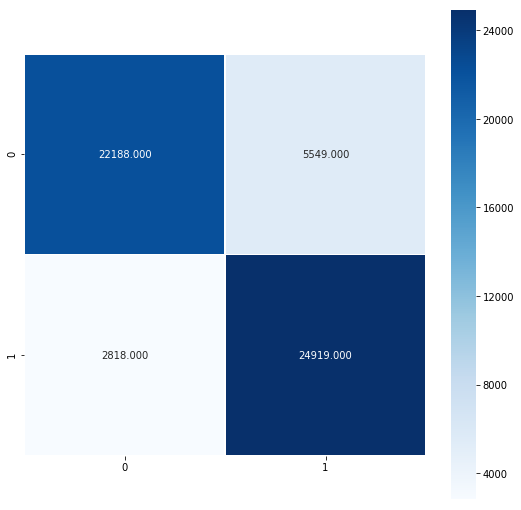

In [41]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [42]:
#Predictions and Evaluations
preds_test = logmodel.predict(X_test)
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7014
           1       0.90      0.89      0.89     13518

   micro avg       0.86      0.86      0.86     20532
   macro avg       0.84      0.84      0.84     20532
weighted avg       0.86      0.86      0.86     20532



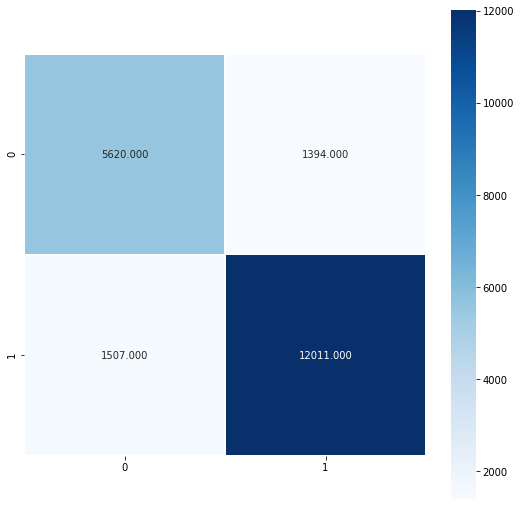

In [43]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [44]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, preds_train))
print('Testing F1 Score:', f1_score(y_test, preds_test))

Training F1 Score: 0.8562494631045443
Testing F1 Score: 0.8922482635664674


#### KNN

In [45]:
# instantiate KNN model
knn = KNeighborsClassifier()

In [46]:
# Fit this KNN model to the training data.
knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[22856  4881]
 [ 1502 26235]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     27737
           1       0.84      0.95      0.89     27737

   micro avg       0.88      0.88      0.88     55474
   macro avg       0.89      0.88      0.88     55474
weighted avg       0.89      0.88      0.88     55474



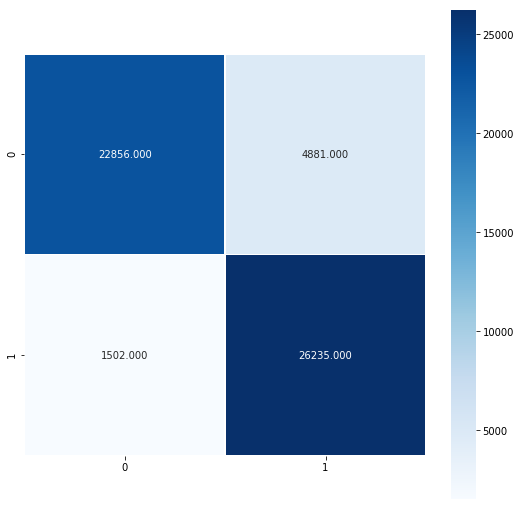

In [47]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [48]:
#Predictions and Evaluations

pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[ 5515  1499]
 [ 1202 12316]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      7014
           1       0.89      0.91      0.90     13518

   micro avg       0.87      0.87      0.87     20532
   macro avg       0.86      0.85      0.85     20532
weighted avg       0.87      0.87      0.87     20532



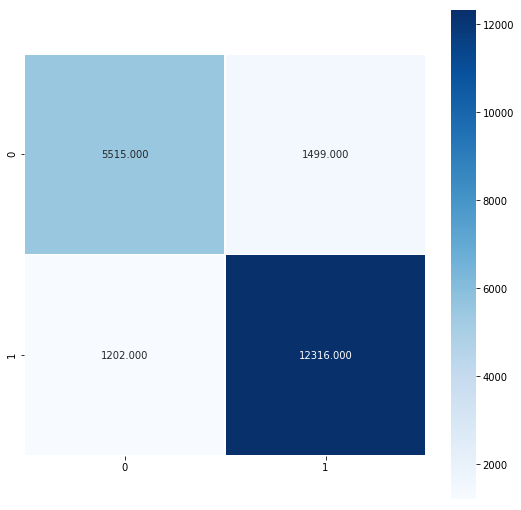

In [49]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [50]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, pred_train))
print('Testing F1 Score:', f1_score(y_test, pred_test))

Training F1 Score: 0.891543336788269
Testing F1 Score: 0.9011817217283138


#### Decision Tree Model

In [92]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
#predict the training set
predictions_train = dtree.predict(X_train)

In [94]:
#predict the testing set
predictions_test = dtree.predict(X_test)

In [95]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, predictions_train))
print('Testing F1 Score:', f1_score(y_test, predictions_test))

Training F1 Score: 0.9993687665698775
Testing F1 Score: 0.8691115543961946


In [96]:
# Predictions and Evaluation of Decision Tree on Training Set

print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27740
           1       1.00      1.00      1.00     27740

   micro avg       1.00      1.00      1.00     55480
   macro avg       1.00      1.00      1.00     55480
weighted avg       1.00      1.00      1.00     55480

[[27739     1]
 [   34 27706]]


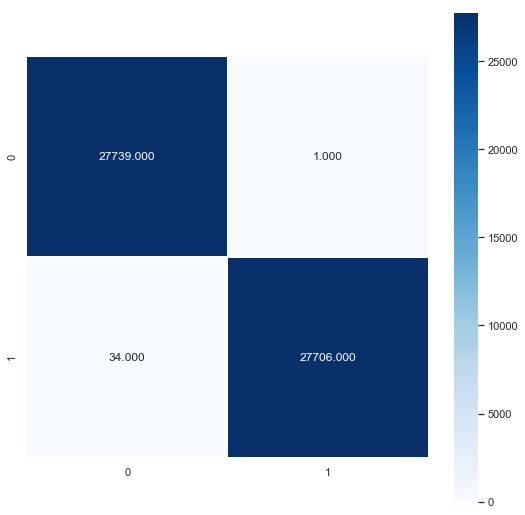

In [97]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, predictions_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [98]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77      7011
           1       0.90      0.84      0.87     13521

   micro avg       0.83      0.83      0.83     20532
   macro avg       0.81      0.83      0.82     20532
weighted avg       0.84      0.83      0.84     20532

[[ 5792  1219]
 [ 2193 11328]]


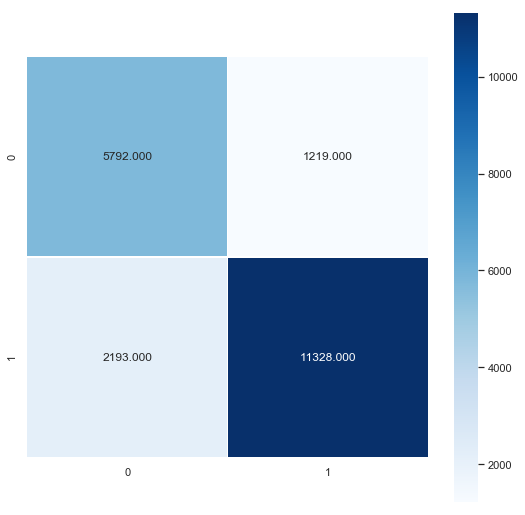

In [99]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, predictions_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

#### Random Forest Model

In [100]:
# instantiate the Random Forest model
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)

In [101]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [102]:
# fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [103]:
# predict using model on training data
rfc_pred_train = rfc.predict(X_train)

# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train, rfc_pred_train))


# checking F1 score
print('Train F1 score: ', f1_score(y_train, rfc_pred_train))

Train Accuracy score:  0.8581831290555155
Train F1 score:  0.8688579238615908


In [104]:
# Predictions and Evaluation of Random Forest on Training Set

print(classification_report(y_train, rfc_pred_train))
print(confusion_matrix(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     27740
           1       0.81      0.94      0.87     27740

   micro avg       0.86      0.86      0.86     55480
   macro avg       0.87      0.86      0.86     55480
weighted avg       0.87      0.86      0.86     55480

[[21548  6192]
 [ 1676 26064]]


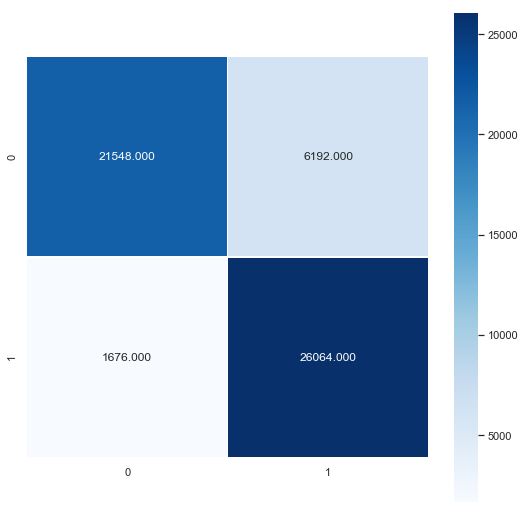

In [105]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, rfc_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [106]:
# predict using model on testing data
rfc_pred_test = rfc.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred_test))


# checking F1 score
print('Test F1 score: ', f1_score(y_test, rfc_pred_test))

Test Accuracy score:  0.8841320864991233
Test F1 score:  0.9143289279412294


In [107]:
# Predictions and Evaluation of Random Forest on Testing Set

print(classification_report(y_test, rfc_pred_test))
print(confusion_matrix(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7011
           1       0.89      0.94      0.91     13521

   micro avg       0.88      0.88      0.88     20532
   macro avg       0.88      0.86      0.87     20532
weighted avg       0.88      0.88      0.88     20532

[[ 5458  1553]
 [  826 12695]]


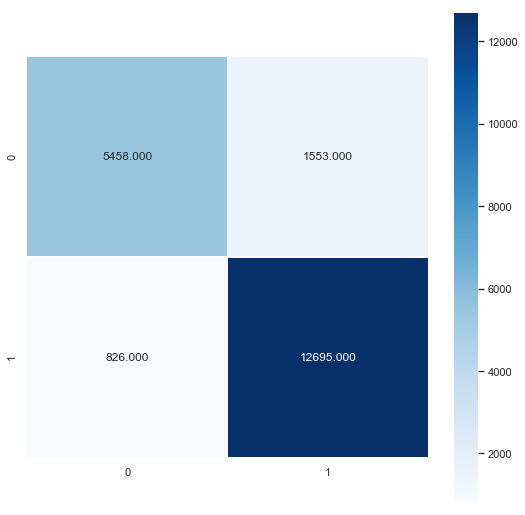

In [108]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, rfc_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

### Hyperparameter Tuning

#### Logistic Regression


In [51]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters_lr = dict(C=C, penalty=penalty)

In [52]:
#Use gridsearch with our pipeline to find best parameters

rs_lr = RandomizedSearchCV(estimator=logmodel,
                     param_distributions=hyperparameters_lr,
                     scoring='f1',
                     cv=5)

In [53]:
# Fit the gridsearch object to the data

rs_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [54]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % rs_lr.best_params_)

# Best training data accuracy
print('Best training accuracy: %.3f' % rs_lr.best_score_)

# Predict on test data with best params
y_pred = rs_lr.predict(X_test)

# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'penalty': 'l1', 'C': 0.5}
Best training accuracy: 0.854
Test set F1 score for best params: 0.894 


#### KNN

In [55]:
# Create the dictionary of hyperparameters we want to test

neighbors = list(range(1, 20, 2))
grid_params_KNN = {'n_neighbors': neighbors,
                    'weights': ['uniform', 'distance']}

In [57]:
# Use gridsearch with our pipeline to find best parameters

rs_KNN = RandomizedSearchCV(estimator=knn,
                      param_distributions=grid_params_KNN,
                      scoring='f1',
                      cv=5)

In [ ]:
# Fit the gridsearch object to the data

rs_KNN.fit(X_train, y_train)

In [ ]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % rs_KNN.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % rs_KNN.best_score_)
# Predict on test data with best params
y_pred = rs_KNN.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

#### Decision Tree Model

In [ ]:
# Create the dictionary of hyperparameters we want to test

tree_depth_range = list(range(1, 20))
max_features_range = list(range(1, 10))
grid_params_dt = [{'max_depth': tree_depth_range,
                   'max_features': max_features_range,
                  'criterion': ['gini', 'entropy']}]

In [ ]:
# Use gridsearch with our pipeline to find best parameters

gs_dt = GridSearchCV(estimator=dtree,
                     param_grid=grid_params_dt,
                     scoring='f1',
                     cv=5)

In [ ]:
# Fit the gridsearch object to the data
gs_dt.fit(X_train, y_train)

In [ ]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_dt.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_dt.best_score_)
# Predict on test data with best params
y_pred = gs_dt.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

#### Random Forest Model

In [ ]:
param_grid = { 
    'n_estimators': [200,300,400],
    'max_features': [0.25, 0.33, 0.5, 0.75],
    'max_depth' : range(5,10,1),
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_


In [ ]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))